# Вебинар 4. Рекоммендательные системы на основе контента. Поиск похожих товаров и пользователей

---

## Комментарии к домашним заданиям

---

## Дополнение по матричным разложениям

### SVD (Singular value decomposition)

![svd](images/svd.png "svd")

### ALS (Alternating Least Squares)

![als](images/als.png "als")

**ALS(explicit)**

Явный отклик.

r - рейтинги <br>
p - вектор-пользователь <br>
q - вектор-айтем <br>

Мы подбираем такие вектора, чтобы $L$ была минимальной (это как ошибка, вспоминаем GD).

Если мы q будем фиксировать, то $L$ превращается в линейную регрессию с регуляризацией  $L_{2}$

Поиск весов по МНК

![als_explicit](images/als_explicit.png "als_explicit")

Фиксируя поочередно p и q, найдем вектора p и q + ошибка $L$ будет минимизироваться.

Перемножая матрицы User-Based ($U_i$) и Item-Based ($V^T$) получим рейтинги, скоры.

В варианте explicit у нас на откликах 0 или 1, или вообще неизвестно. А нам хочется получить какое-то приближение матрицы, ведь у нас исходная - разряженная матрица. И в случае с implicit у нас будет другая функция потерь $L$.

**ALS(implicit)**

Неявный отклик

![als_implicit](images/als_implicit.png "als_implicit")

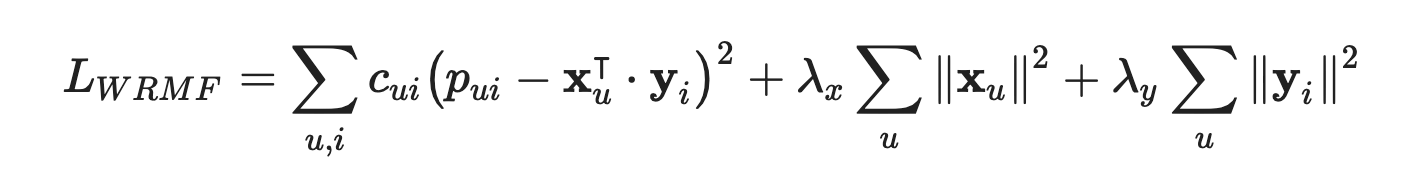

$x_u^T$ - user embeddings  
$y_i$ - item embeddings  
$p_{ui}$ - 0/1. 1 - если в матрице user-item эдемент > 0 (было взаимодействие)  
$c_{ui}$ - Вес ошибки = элемент матрицы user-item  
$\lambda_x$, $\lambda_y$ - коэффициенты регуляризации  

**Алгоритм**  
ALS - лишь способ оптимизации (поиска коэффициентов в эмбеддингах):  

1. Фиксируем эмбеддинги юзеров $x_u^T$ --> легко посчитать производную по эмбеддингам товаров $y_i$
2. Обновляем эмбеддинги товаров (делаем шаг по антиградиенту = градиентный спуск)
3. Фиксируем эмбеддинги товаров $y_i$ --> легко посчитать производную по эмбеддингам юзеров $x_u^T$
4. Обновляем эмбеддинги юзеров (делаем шаг по антиградиенту = градиентный спуск)
5. Повторяем, пока процедура не сойдется

### EASE (Embrrassingly Shallow Autoencoders for Sparse Data)

![ease](images/ease.png "ease")

В чем идея? Нужно найти матрицу взаимодействия всех итемов со всеми итемами (Item-Item matrix) $W$. У нас есть матрица взаимодействий, она обозначена $A$. $\tilde{A}$ - примерно похожая матрице $A$. Итерационно мы ищем матрицу item-item $W$. Логично предположить, что выражение истинно, если $W=E$, однако по этому поводу в данном разложении есть условие $diag(W) = 0$, которое говорит нам о том, что диагональ искомой матрицы должна равняться нулю.

$W$ - искомая матрица item-item (взамодействие всех айтемов со всеми айтемами), <br>
$X$ - матрица взаимодействий, <br>
$B$ - матрица весов, которую мы ищем (ака матрица $W$), <br>
$F$ - норма Фробениуса.

Условие: диагональ матрицы B равна 0. Если будут не нули, то тогда у этого выражения есть элементарное решение в виде единичной матрицы.

Обычно решается просто аналитеским решением. Находим, когда производная равна нулю ($L_{2}$ норма позвоялет) и собственно отсюда находим минимум функции -> матрицу $B$.

Есть конечно большой минус того, что когда матрица сильно заполнена, то найти решение трудно (ресурсоемко) и есть другое решение. Называется SLIM.

### SLIM (Sparse Linear Model)

Здесь мы также хотим приблизить матрицу взаимодействий.

![slim](images/slim.png "slim")

Как это сделать? Все похоже как и в EASE, но здесь вместо $L_{2}$ регуляризации используется смешанная регуляризация (**elastic net**): линейная комбинация $L_{2}$ (ridge) и $L_{1}$ (lasso) регуляризаций. Кроме того, $W \geq 0$ означает, что все элементы искомой матрицы будут неотрицательными.

Данное разложение не находится аналитически (так как $L_1$). Только итерационно (например, градиентный спуск). Но можно заметить, что эту задачу можно решать не целиком, а разбить на подзадачи: разбить матрицу $W$ на строки и тогда получится, что для каждой строки будет задача.

Задача для каждой строки:
- минимизация
- $w_{j} \geq 0$ и $w_{j,j} = 0$

$a_j$ - ответы <br>
$A$ - матрица признаков  <br>
$w_j$ - вектор весов <br>

В итоге получится задача регрессии.

Плюсы: 
- Благодаря разбиению на подзадачи мы сможем распараллелить процесс обучения. 
- Из-за того, что есть $L_1$ мы сможем определить ненужные признаки, ведь часть признаков будет иметь нулевой вес, а итоговая матрица будет содержать какое-то количество нулей в зависимости коэффициентов регуляризации. 

Рассматриваемые методы показывают наилучшие результаты в бенчмарках по рекомендательным системам. Данные методы нужно было обязательно рассмотреть.

---

## Возвращаемся к теме урока. 

Пройдем рекомендательные системы с ранжирующим лоссом (BPR). Обсудим поиск товаров и пользователей.

### 1. Общие

ALS
- На вход принимает только *позитивные* взаимодействия
- Прогнозирует **не** вероятность, а некоторые числа
- В ALS нельзя добавить внешние фичи
- ALS не учитывает сезонность / зависимость во времени (но это можно частично поправить - см далее) - ПРОБЛЕМА ВСЕХ КОЛЛАБОРАТИВНЫХ МЕТОДОВ
- Можно использовать для ранжирования (как - см далее + вебинар 5)
- Холодный старт (в ALS мы передает пользователя с взаимодействием, но если взаимодействия нет, то мы тогда не сможем ничего предсказать). Одна из серьезных проблем ALS

### 2. Что на самом деле оптимизирует ALS

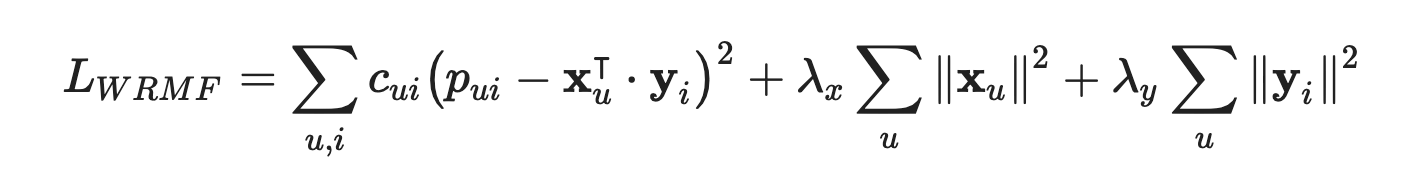

$x_u^T$ - user embeddings  
$y_i$ - item embeddings  
$p_{ui}$ - 0/1. 1 - если в матрице user-item эдемент > 0 (было взаимодействие)  
$c_{ui}$ - Вес ошибки = элемент матрицы user-item  
$\lambda_x$, $\lambda_y$ - коэффициенты регуляризации  

**Что делает ALS**
- Максимизирует скалярное произведение (dot product) между векторами user-item для позитивных interactions, минимизирует для негативных

- И получается что между собой объекты никак не сравниваются (не ранжируются) - решается с помощью BPR

**Скалярное призведение (dot product) VS косинусная схожесть (cosine similarity)**

$$dot(a, b) = a * b$$  
  
$$cos(a, b) = \frac{a * b}{||a||*||b||} = \frac{dot(a, b)}{||a||*||b||}$$

### 3. Как учитывать изменение вкусов потребителей во времени / изменение популярности товара во времени

- Летом юзеры любят мороженое, а зимой - нет
- Многие фильмы популярны во время проката в кино, затем их популярность снижается

*Что делать?*  
Ограничить давность взаимодейстий.  
Давать последним взаимодействиям больший вес:  

$$value_w = \sum_i value_i \cdot \frac{1}{1 + \exp^{ \alpha t}}$$

Это чистое взвешивание, взвешивание по времени.

### 4. Как использовать для ранжирования (Краткое введение. Подробности - на следующем вебинаре)

**Вариант 1.**  
*As is* - ранжировать по output ALS

**Вариант 2.**
*Та же модель, другой лосс - BPR*

BPR - Bayesian Personalized Ranking loss
1. Случайная пара user - купленный им item_i = позитивная пара
2. Для того же юзера сэмплируем item_j (не купил или вес в user-item матрице ниже, у item_i из 1.) - негативная пара
3. Прогнозы модели $p_{ui}$, $p_{uj}$ --> $p_{ui} - p_{uj}$
4. loss = $\sigma(p_{ui} - p_{uj})$ - это и есть наша ошибка (значение будет от 0 до 1, активация)
5. Обновляем эмбеддинги

In [1]:
from implicit.bpr import BayesianPersonalizedRanking 

Синтаксис такой же как у AlternatingLeastSquares. ML модель такая же, лосс - BPR

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Для работы с матрицами
from scipy.sparse import csr_matrix

# Матричная факторизация
from implicit.als import AlternatingLeastSquares
from implicit.bpr import BayesianPersonalizedRanking
from implicit.nearest_neighbours import ItemItemRecommender  # нужен для одного трюка
from implicit.nearest_neighbours import bm25_weight, tfidf_weight

# Функции из 1-ого вебинара
import os, sys

# module_path = os.path.abspath(os.path.join(os.pardir))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
# from src.metrics import precision_at_k, recall_at_k
# from src.utils import prefilter_items

In [3]:
data = pd.read_csv('../data/retail_train.csv')

data.columns = [col.lower() for col in data.columns]
data.rename(columns={'household_key': 'user_id',
                    'product_id': 'item_id'},
           inplace=True)


test_size_weeks = 3

data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

data_train.head(2)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0


In [4]:
item_features = pd.read_csv('../data/product.csv')
item_features.columns = [col.lower() for col in item_features.columns]
item_features.rename(columns={'product_id': 'item_id'}, inplace=True)

item_features.head(2)

,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,


In [5]:
result = data_test.groupby('user_id')['item_id'].unique().reset_index()
result.columns=['user_id', 'actual']
result.head(2)

,user_id,actual
0,1,"[821867, 834484, 856942, 865456, 889248, 90795..."
1,3,"[835476, 851057, 872021, 878302, 879948, 90963..."


In [6]:
popularity = data_train.groupby('item_id')['quantity'].sum().reset_index()
popularity.rename(columns={'quantity': 'n_sold'}, inplace=True)

top_5000 = popularity.sort_values('n_sold', ascending=False).head(5000).item_id.tolist()

In [7]:
# Заведем фиктивный item_id (если юзер покупал товары из топ-5000, то он "купил" такой товар)
data_train.loc[~data_train['item_id'].isin(top_5000), 'item_id'] = 999999

user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', 
                                  columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат saprse matrix
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(3)

item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

In [9]:
def precision_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list 
    recommended_list = recommended_list[:k]
    flags = np.isin(bought_list, recommended_list)
    precision = flags.sum() / len(recommended_list)
    
    return precision

In [10]:
tf_idf_user_item_matrix = tfidf_weight(user_item_matrix)

In [11]:
%%time

model = AlternatingLeastSquares(factors=20, 
                                regularization=0.05,
                                iterations=10, 
                                calculate_training_loss=True, 
                                num_threads=4)

model.fit(tf_idf_user_item_matrix,  # На вход item-user matrix
          show_progress=True)

C:\Users\kikoooiemama\anaconda3\envs\rec_systems\Lib\site-packages\implicit\utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.005000591278076172 seconds
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 8.34 s
Wall time: 969 ms


In [12]:
# def get_recommendations(user, model, sparse_user_item, N=5):
#     res = [id_to_itemid[rec] for rec in 
#                     model.recommend(userid=userid_to_id[user], 
#                                     user_items=sparse_user_item[userid_to_id[user]],   # на вход user-item matrix
#                                     N=N, 
#                                     filter_already_liked_items=False, 
#                                     filter_items=[itemid_to_id[999999]], 
#                                     recalculate_user=True)[0]] 
#     return res

In [13]:
def get_recommendations(user, model, N=5):
    res = [id_to_itemid[rec] for rec in 
                    model.recommend(userid=userid_to_id[user], 
                                    user_items=csr_matrix(user_item_matrix).tocsr()[userid_to_id[user]],   
                                    N=N, 
                                    filter_already_liked_items=False, 
                                    filter_items=[itemid_to_id[999999]], 
                                    recalculate_user=False)[0]] 
    return res

In [14]:
%%time
    
result['tf_idf'] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
result.apply(lambda row: precision_at_k(row['tf_idf'], row['actual']), axis=1).mean()

ValueError: cython_lapack.posv failed (err=19) on row 0. Try increasing the regularization parameter.

In [15]:
result.head(2)

,user_id,actual
0,1,"[821867, 834484, 856942, 865456, 889248, 90795..."
1,3,"[835476, 851057, 872021, 878302, 879948, 90963..."


Теперь BPR

In [16]:
%%time
# Баесовский ранжирующий Лосс
model = BayesianPersonalizedRanking(factors=20, 
                                    regularization=0.02,
                                    iterations=10, 
                                    num_threads=4)

model.fit(tf_idf_user_item_matrix,  # На вход item-user matrix
          show_progress=True)

C:\Users\kikoooiemama\anaconda3\envs\rec_systems\Lib\site-packages\implicit\utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00499272346496582 seconds
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 2.22 s
Wall time: 561 ms


In [17]:
# как видим в bpr нету параметра recalculate_user.
def get_recommendations_bpr(user, model, N=5):
    res = [id_to_itemid[rec] for rec in 
                    model.recommend(userid=userid_to_id[user], 
                                    user_items=csr_matrix(user_item_matrix).tocsr()[userid_to_id[user]],   
                                    N=N, 
                                    filter_already_liked_items=False, 
                                    filter_items=[itemid_to_id[999999]]
                                   )[0]] 
    return res

In [18]:
%%time
    
result['bpr'] = result['user_id'].apply(lambda x: get_recommendations_bpr(x, model=model, N=5))
result.apply(lambda row: precision_at_k(row['bpr'], row['actual']), axis=1).mean()

CPU times: total: 5min 2s
Wall time: 5min 1s


0.1503428011753183

In [19]:
result.head(2)

,user_id,actual,bpr
0,1,"[821867, 834484, 856942, 865456, 889248, 90795...","[1082185, 981760, 826249, 840361, 1127831]"
1,3,"[835476, 851057, 872021, 878302, 879948, 90963...","[1082185, 981760, 826249, 1098066, 840361]"


----

# Альтернативные способы предсказаний

### Кейс 1. Продажи товаров собственной торговой марки (СТМ)

У многих ритейлеров есть товары СТМ:
    - Азбука Вкуса - Просто Азбука
    - Ашан - Каждый день
    - ВкусВилл - ВкусВилл
    - ...
    
Как правило, у них маржинальность (~прибыль) > обычные товары.   
Как сделать так, чтобы юзеры переключились на товары СТМ? - *рекоммендации!*

*Нужно заменить те товары, которые пользователь уже покупает, на товары СТМ*

In [20]:
item_features.head(2)

,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,


In [21]:
item_features = item_features[item_features['item_id'].isin(itemid_to_id.keys())]
item_features[item_features['brand'] == 'Private'].item_id.nunique()

1464

Из матрицы продуктов вытащили категории товаров

In [22]:
own_items = item_features[item_features['brand'] == 'Private'].\
    groupby('department')['item_id'].nunique().\
    sort_values(ascending=False)
own_items

department
GROCERY            1229
MEAT-PCKGD           74
PRODUCE              32
PASTRY               31
DELI                 25
MISC SALES TRAN      20
DRUG GM              14
KIOSK-GAS            13
SEAFOOD-PCKGD        12
MEAT                  8
NUTRITION             5
FLORAL                1
Name: item_id, dtype: int64

In [23]:
categories_with_own_items = own_items.index.tolist()

In [24]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
import pickle

from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns


def reduce_dims(df, dims=2, method='pca'):
    
    assert method in ['pca', 'tsne'], 'Неверно указан метод'
    
    if method=='pca':
        pca = PCA(n_components=dims)
        components = pca.fit_transform(df)
    elif method == 'tsne':
        tsne = TSNE(n_components=dims, learning_rate=250, random_state=42, n_iter=300, n_iter_without_progress=20)
        components = tsne.fit_transform(df)
    else:
        print('Error')
        
    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return pd.DataFrame(data = components, columns = colnames) 


def display_components_in_2D_space(components_df, labels='category', marker='D'):
    
    groups = components_df.groupby(labels)

    # Plot
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.component_1, group.component_2, 
                marker='o', ms=6,
                linestyle='',
                alpha=0.7,
                label=name)
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

    plt.xlabel('component_1')
    plt.ylabel('component_2') 
    plt.show()

In [25]:
model.item_factors.shape

(5001, 21)

In [26]:
category = []

for idx in range(model.item_factors.shape[0]):

    try:
        cat = item_features.loc[item_features['item_id'] == id_to_itemid[idx], 'department'].values[0]
        category.append(cat)
    except:
        category.append('UNKNOWN')

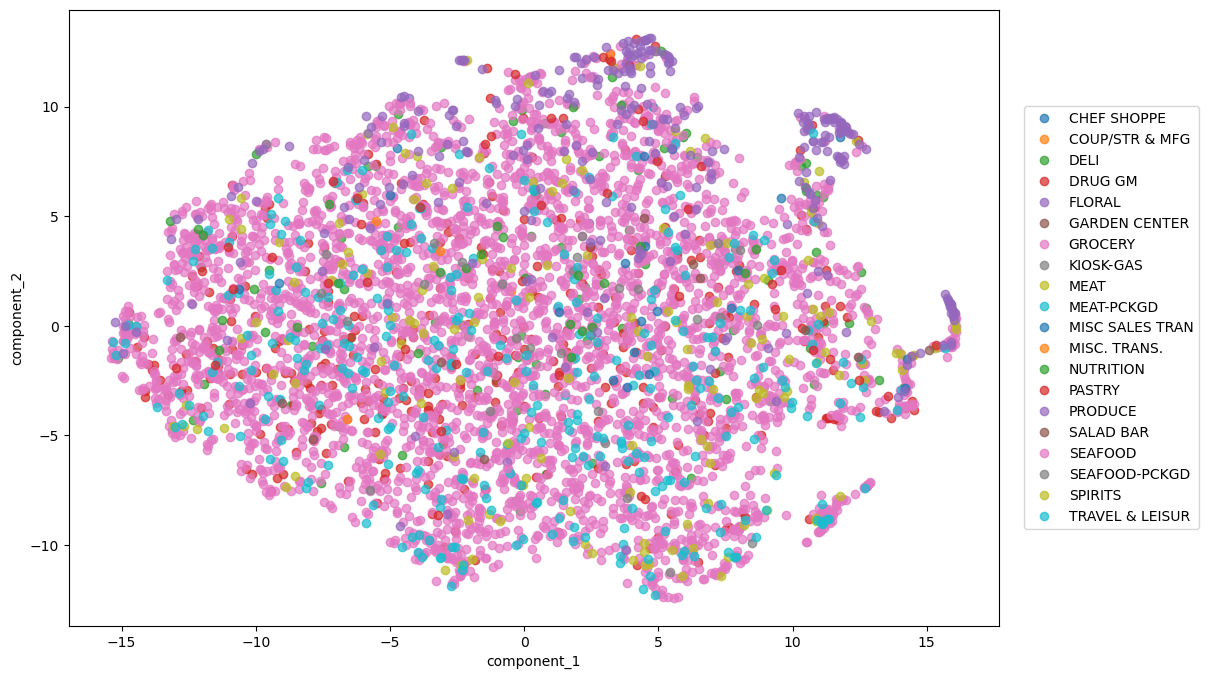

CPU times: total: 1min 2s
Wall time: 5.61 s


In [27]:
%%time
item_emb_tsne = reduce_dims(model.item_factors, dims=2, method='tsne')
item_emb_tsne['category'] = category  # Добавляем категорию
item_emb_tsne['item_id'] = list(itemid_to_id.keys())
item_emb_tsne = item_emb_tsne[item_emb_tsne['category'] != 'UNKNOWN']

display_components_in_2D_space(item_emb_tsne, labels='category')

In [28]:
item_emb_tsne_reduced = item_emb_tsne[item_emb_tsne['category'] != 'GROCERY']

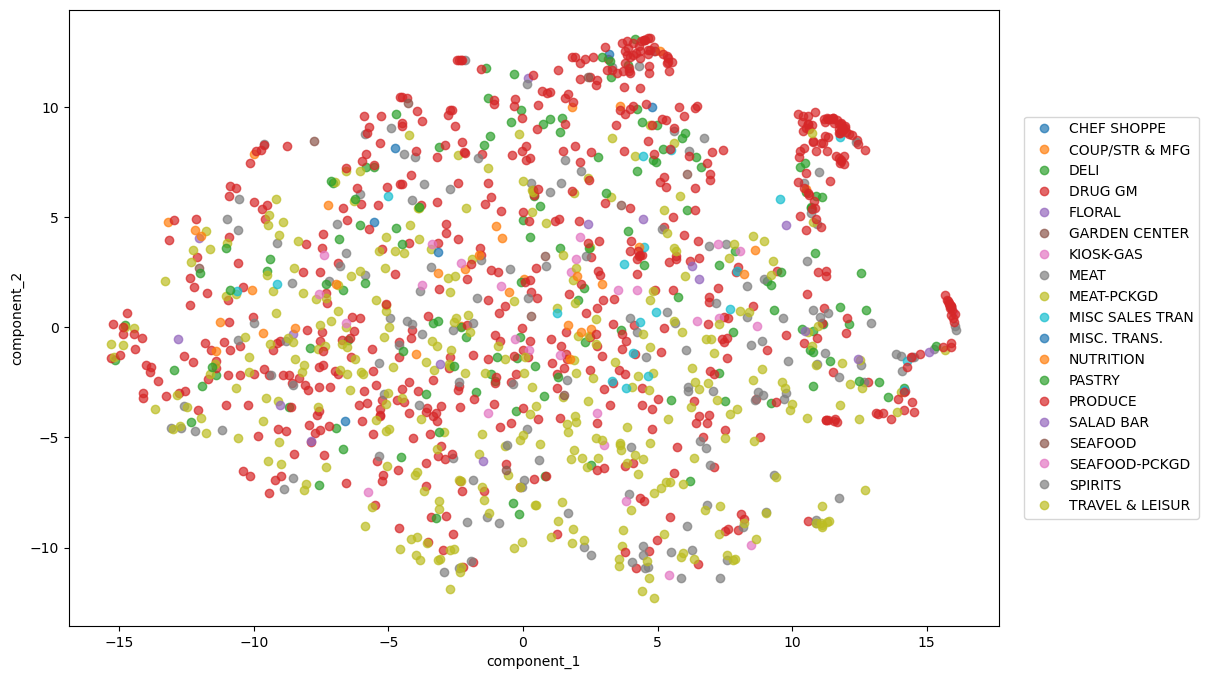

In [29]:
display_components_in_2D_space(item_emb_tsne_reduced, labels='category')

Нарисуем все товары в катгеориях, где есть СТМ

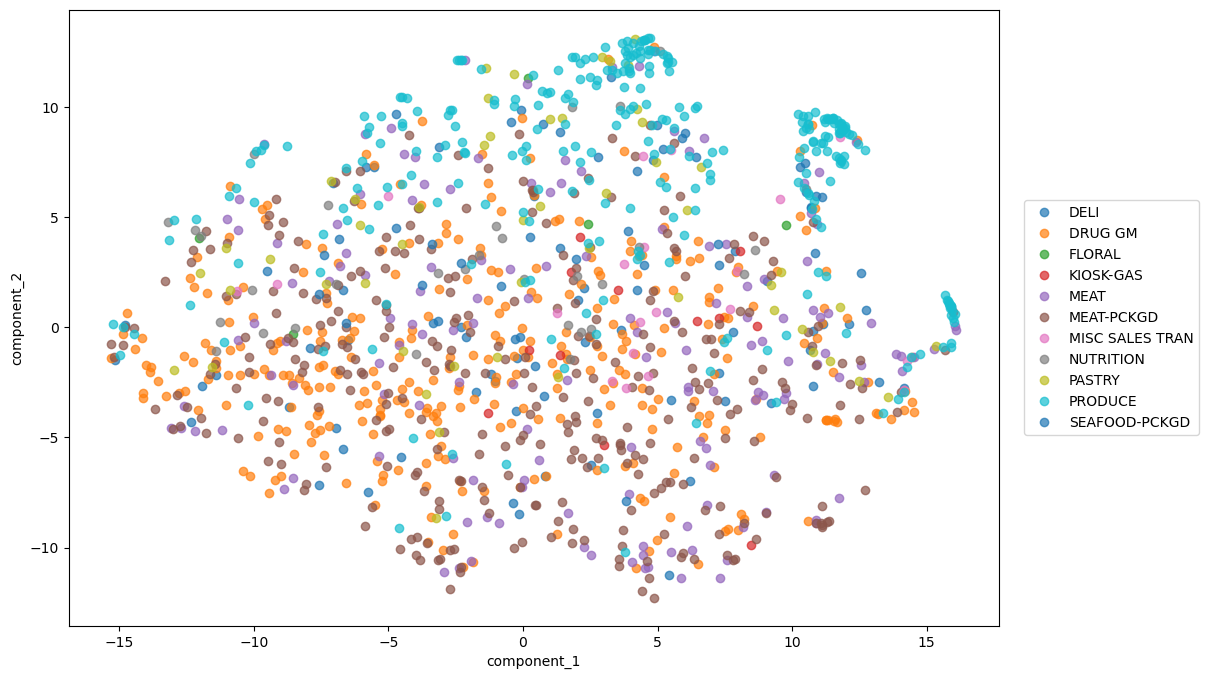

In [30]:
display_components_in_2D_space(item_emb_tsne_reduced[item_emb_tsne_reduced['category'].isin(categories_with_own_items)], 
                               labels='category')

Построим для айтема список похожих айтемов и отобразим

In [123]:
itemids

array([  202291,   397896,   420647, ..., 15927661, 15927850, 16809471],
      dtype=int64)

In [126]:
similar_items = model.similar_items(itemid_to_id[1133018 ], N=50)
similar_items

(array([4016, 3200,  202, 1029, 1383, 3388, 2380, 3557, 3688, 1811, 2692,
        2965, 2927, 4662, 4250, 4519, 2847, 3906,  845, 3323, 1826, 1262,
        3029, 4159, 4672, 2367,  338, 1967, 4667, 1586, 3522, 4733, 2680,
        1795,  755,  893, 3098, 2995, 3546,  731,   72, 1373, 4515, 4141,
         528, 3507, 2915, 3450, 1923,   10]),
 array([0.9999998 , 0.992226  , 0.98962355, 0.98708767, 0.9869153 ,
        0.9855453 , 0.9842835 , 0.9831836 , 0.9814466 , 0.98076093,
        0.9797121 , 0.97918195, 0.9786607 , 0.9785481 , 0.97794795,
        0.9776314 , 0.9776143 , 0.97750276, 0.976699  , 0.9759461 ,
        0.97557664, 0.97545224, 0.9744983 , 0.9740484 , 0.9732757 ,
        0.9728946 , 0.97224885, 0.97201365, 0.97198623, 0.97102565,
        0.9704828 , 0.97034174, 0.97025955, 0.9699503 , 0.96889657,
        0.968252  , 0.9680356 , 0.96761197, 0.96682453, 0.96466315,
        0.9640964 , 0.96346194, 0.96280247, 0.96129674, 0.9611529 ,
        0.96082705, 0.96025574, 0.9593885 , 0.

In [42]:
similar_items[0][1]

3587

In [106]:
similar_items = [id_to_itemid[sim] for sim in similar_items[0]]
similar_items[:3]

[1004906, 1098066, 1068719]

In [44]:
similar_items.append(1004906)

In [45]:
item_emb_tsne[item_emb_tsne['item_id'] == 1004906]

,component_1,component_2,category,item_id
2434,16.014112,0.249028,PRODUCE,1004906


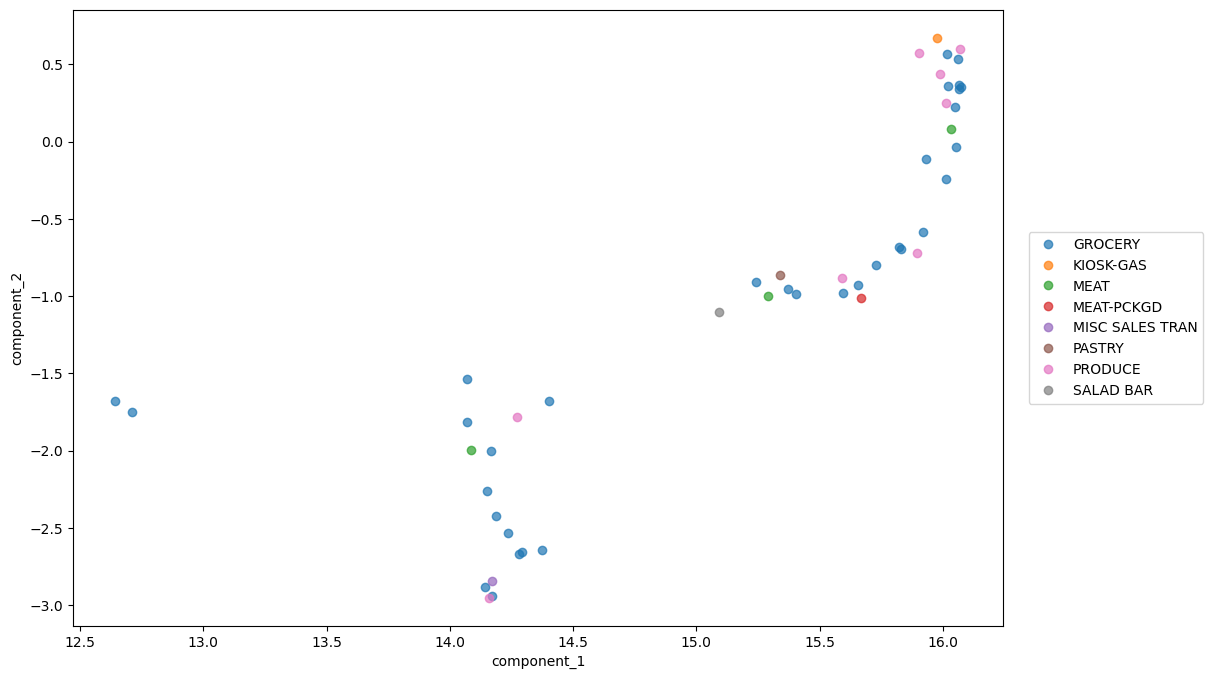

In [46]:
display_components_in_2D_space(item_emb_tsne[item_emb_tsne['item_id'].isin(similar_items)], 
                               labels='category')

Берем топ-5 популярных покупок юзера --> находим по 1 наиболее близкому товару СТМ для них --> рекомендуем

In [107]:
# your_code

popularity = data_train.groupby(['user_id', 'item_id'])['quantity'].count().reset_index()
popularity.sort_values('quantity', ascending=False, inplace=True)

popularity = popularity[popularity['item_id'] != 999999]

popularity = popularity.groupby('user_id').head(5)

popularity.sort_values('user_id', ascending=False, inplace=True)
popularity.head(2)

,user_id,item_id,quantity
666913,2500,1058997,9
666919,2500,1065538,10


In [108]:
%%time

def get_rec(model, x):
    recs = model.similar_items(itemid_to_id[x], N=2)
    top_rec = recs[0][1]
    return id_to_itemid[top_rec]
    

popularity['similar_recommendation'] = popularity['item_id'].apply(lambda x: get_rec(model, x))
popularity.head(3)

CPU times: total: 438 ms
Wall time: 426 ms


,user_id,item_id,quantity,similar_recommendation
666913,2500,1058997,9,901062
666919,2500,1065538,10,879808
667027,2500,6534178,12,1082185


In [109]:
recommendation_similar_items = popularity.groupby('user_id')['similar_recommendation'].unique().reset_index()
recommendation_similar_items.columns=['user_id', 'similar_recommendation']
recommendation_similar_items.head(2)

,user_id,similar_recommendation
0,1,"[1044078, 999999, 981760, 838010, 825313]"
1,2,"[1033142, 1092026, 995242, 1044078, 1065593]"


In [110]:
result = result.merge(recommendation_similar_items, on='user_id', how='left')
result.head(2)

,user_id,actual,bpr,similar_recommendation
0,1,"[821867, 834484, 856942, 865456, 889248, 90795...","[1082185, 981760, 826249, 840361, 1127831]","[1044078, 999999, 981760, 838010, 825313]"
1,3,"[835476, 851057, 872021, 878302, 879948, 90963...","[1082185, 981760, 826249, 1098066, 840361]","[1085604, 910032, 1118533, 923746, 1044078]"


In [111]:
%load_ext autoreload

In [176]:
# %autoreload
# from src.metrics import precision_at_k

# result.apply(lambda row: precision_at_k(row['similar_recommendation'], row['actual']), axis=1).mean()

### Кейс 2. Вашим друзьям нравится / Похожим пользователям нравится / ...

Пользователь --> похожих пользовтелей --> рекомендовать те товары, которые купили похожие юзеры

In [114]:
userid_to_id[10]

9

In [115]:
model.similar_users(userid_to_id[10], N=6)

(array([   9,  495,  825, 2254,  122,  175]),
 array([1.        , 0.9984058 , 0.99831074, 0.9981044 , 0.9980045 ,
        0.99797845], dtype=float32))

In [116]:
%%time

own = ItemItemRecommender(K=1, num_threads=4) # K - кол-во билжайших соседей

own.fit(csr_matrix(user_item_matrix).T.tocsr(), 
          show_progress=True)

recs = model.recommend(userid=userid_to_id[1], 
                        user_items=csr_matrix(user_item_matrix).tocsr(),   # на вход user-item matrix
                        N=5, 
                        filter_already_liked_items=False, 
                        filter_items=None, 
                        recalculate_user=False)

  0%|          | 0/2499 [00:00<?, ?it/s]

CPU times: total: 1.22 s
Wall time: 465 ms


In [117]:
get_recommendations(user=1, model=own, N=1)

[995896]

---

### Важный момент 

Считая Precision@k на не важен порядок, хотелось бы рассмотреть еще вариант расчета метрик, например, где важно ранжирование 

Просто так нельзя заменить Precision@k на MAP@k. Давайте разберем этот случай.

1:12:20

In [127]:
# Метрика, учитывающая порядок.
def ap_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(k):
        
        if flags[i]:
            p_k = precision_at_k(recommended_list, bought_list, k=i+1)
            sum_ += p_k
            
    result = sum_ / k
    
    return result

In [128]:
tf_idf_user_item_matrix = tfidf_weight(user_item_matrix)

In [129]:
%%time

model = AlternatingLeastSquares(factors=20, 
                                regularization=0.02,
                                iterations=10, 
                                calculate_training_loss=True, 
                                num_threads=4)

model.fit(tf_idf_user_item_matrix,  # На вход item-user matrix
          show_progress=True)

C:\Users\kikoooiemama\anaconda3\envs\rec_systems\Lib\site-packages\implicit\utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.006001472473144531 seconds
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 8.5 s
Wall time: 1.03 s


Казалось бы мы можем сделать вот так:

In [130]:
%%time
    
result['tf_idf'] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
result.apply(lambda row: ap_at_k(row['tf_idf'], row['actual']), axis=1).mean()

ValueError: cython_lapack.posv failed (err=4) on row 0. Try increasing the regularization parameter.

In [131]:
model.recommend(userid=userid_to_id[10], 
                        user_items=csr_matrix(user_item_matrix).tocsr(),   # на вход user-item matrix
                        N=5, 
                        filter_already_liked_items=False, 
                        filter_items=[itemid_to_id[999999]], 
                        recalculate_user=False)

(array([3767, 1383, 3477, 2536, 3956]),
 array([0.20475735, 0.16966003, 0.16146097, 0.159291  , 0.15853727],
       dtype=float32))

Видим, что с порядком все ок. Проблем нет. Но есть случаи, когда порядка нет:

In [132]:
%%time

model = ItemItemRecommender(10, num_threads=4)

model.fit(sparse_user_item,  # На вход item-user matrix
          show_progress=True)

  0%|          | 0/5001 [00:00<?, ?it/s]

CPU times: total: 1.45 s
Wall time: 648 ms


In [133]:
model.recommend(userid=userid_to_id[10], 
                        user_items=sparse_user_item,   # на вход user-item matrix
                        N=5, 
                        filter_already_liked_items=False, 
                        filter_items=[itemid_to_id[999999]], 
                        recalculate_user=False)

(array([3408, 4346, 2757, 2307, 2148]),
 array([1.17886838e+10, 8.50744540e+09, 5.56266137e+09, 4.35894409e+09,
        3.35840688e+09]))

Получили рандомный порядок. Видим что id - значение схожести не отсортироаны по значению схожести. Значения неупорядочены. Посчитаем ap_at_k

In [134]:
%%time
    
result['itemitem'] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
result.apply(lambda row: ap_at_k(row['itemitem'], row['actual']), axis=1).mean()

CPU times: total: 5min 12s
Wall time: 5min 12s


0.1541429970617042

Теперь отсортируем рекомендации (От самого большого к самому малому) и посмотрим результат:

In [135]:
def get_sort_recommendations(user, model, N=5):
    
    recs = model.recommend(userid=userid_to_id[user], 
                                    user_items=sparse_user_item,   
                                    N=N, 
                                    filter_already_liked_items=False, 
                                    filter_items=[itemid_to_id[999999]], 
                                    recalculate_user=True)
    
    mask = recs[1].argsort()[::-1]
    res = [id_to_itemid[rec] for rec in recs[0]]
    
    return res

In [136]:
get_sort_recommendations(10, model=model, N=5)

[1082185, 6534178, 1029743, 995242, 981760]

In [137]:
%%time
    
result['itemitem'] = result['user_id'].apply(lambda x: get_sort_recommendations(x, model=model, N=5))
result.apply(lambda row: ap_at_k(row['itemitem'], row['actual']), axis=1).mean()

CPU times: total: 234 ms
Wall time: 231 ms


0.1541429970617042

Правильно посортировали в порядке убывания похожести, релевантности айтемов для нашего пользователя. И получили результат лучше, поскольку метрика учитывает порядок. После сортировки метрика стала намного лучше. 

Сегодня закончили с коллаборативными методами :)

-----

# Production

In [ ]:
def prefilter_items(data):
    # Уберем самые популярные товары (их и так купят)
    popularity = data_train.groupby('item_id')['user_id'].nunique().reset_index() / data_train['user_id'].nunique()
    popularity.rename(columns={'user_id': 'share_unique_users'}, inplace=True)
    
    top_popular = popularity[popularity['share_unique_users'] > 0.5].item_id.tolist()
    data = data[~data['item_id'].isin(top_popular)]
    
    # Уберем самые НЕ популярные товары (их и так НЕ купят)
    top_notpopular = popularity[popularity['share_unique_users'] < 0.01].item_id.tolist()
    data = data[~data['item_id'].isin(top_notpopular)]
    
    # Уберем товары, которые не продавались за последние 12 месяцев
    
    # Уберем не интересные для рекоммендаций категории (department)
    
    # Уберем слишком дешевые товары (на них не заработаем). 1 покупка из рассылок стоит 60 руб. 
    
    # Уберем слишком дорогие товарыs
    
    # ...
    
def postfilter_items(user_id, recommednations):
    pass

In [ ]:
def get_recommendations(user, model, sparse_user_item, N=5):
    """Рекомендуем топ-N товаров"""
    
    res = [id_to_itemid[rec[0]] for rec in 
                    model.recommend(userid=userid_to_id[user], 
                                    user_items=sparse_user_item,   # на вход user-item matrix
                                    N=N, 
                                    filter_already_liked_items=False, 
                                    filter_items=[itemid_to_id[999999]],  # !!! 
                                    recalculate_user=True)]
    return res

In [ ]:
def get_similar_items_recommendation(user, model, N=5):
    """Рекомендуем товары, похожие на топ-N купленных юзером товаров"""
    
    # your_code
    
    return res

In [ ]:
def get_similar_users_recommendation(user, model, N=5):
    """Рекомендуем топ-N товаров, среди купленных похожими юзерами"""
    
    # your_code
    
    return res

Все эти функции отправим затем в *src.**

----